# Ciencia de Datos. TP2: Series Temporales

Axel Maddonni, LU 200/14 <br>
Federico Patane, LU 683/10<br>


*Septiembre 2017*

***

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sps
import scipy.io as sio
%matplotlib inline
matplotlib.style.use('ggplot')

def convertToDataFrame(data):
    epochs, electrodos, tiempos =  data.shape
    data = data.reshape((electrodos*epochs, tiempos))

    l1 = []
    l2 = []
    datos = []
    for x in range(0, electrodos) : 
        for y in range(0, epochs) : 
            l1.append(x)
            l2.append(y)

    l =  [l1,l2]
    tuples = list(zip(*l))

    index = pd.MultiIndex.from_tuples(tuples, names=['electrodos', 'epochs'])

    return pd.DataFrame(data, index=index)

def dataEpochs(df):
    return df.shape[0] / electrodos

electrodos, tiempos =  256, 201

In [ ]:
dfs = [
    convertToDataFrame(sio.loadmat('P01.mat')['data']),
    convertToDataFrame(sio.loadmat('P02.mat')['data']),
    convertToDataFrame(sio.loadmat('P03.mat')['data']),
    convertToDataFrame(sio.loadmat('P04.mat')['data']),
    convertToDataFrame(sio.loadmat('P05.mat')['data']),
    convertToDataFrame(sio.loadmat('P06.mat')['data']),
    convertToDataFrame(sio.loadmat('P07.mat')['data']),
    convertToDataFrame(sio.loadmat('P08.mat')['data']),  
    convertToDataFrame(sio.loadmat('P09.mat')['data']),
    convertToDataFrame(sio.loadmat('P10.mat')['data']),
    convertToDataFrame(sio.loadmat('S01.mat')['data']),
    convertToDataFrame(sio.loadmat('S02.mat')['data']),
    convertToDataFrame(sio.loadmat('S03.mat')['data']),
    convertToDataFrame(sio.loadmat('S04.mat')['data']),
    convertToDataFrame(sio.loadmat('S05.mat')['data']),
    convertToDataFrame(sio.loadmat('S06.mat')['data']),
    convertToDataFrame(sio.loadmat('S07.mat')['data']),
    convertToDataFrame(sio.loadmat('S08.mat')['data']),
    convertToDataFrame(sio.loadmat('S09.mat')['data']),
    convertToDataFrame(sio.loadmat('S10.mat')['data']) ]

In [6]:
def get_espectro(frecuencia, potencia):
    delta, theta, alpha, beta, gamma = 0, 0, 0, 0, 0
    i = 0
    while i < len(frecuencia) : 
        if frecuencia[i] < 4 : 
            delta += potencia[i]
        else : 
            if frecuencia[i] >= 4 and frecuencia[i] < 8 :
                theta += potencia[i]
            else : 
                if frecuencia[i] >= 8 and frecuencia[i] < 13 :
                    alpha += potencia[i]
                else : 
                    if frecuencia[i] >= 13 and frecuencia[i] < 30 :
                        beta += potencia[i]
                    else : 
                        gamma += potencia[i]
        i = i + 1
    return delta , theta , alpha , beta , gamma

def calcularBandasDeFrecuenciaMedia(data, paciente):
    deltaProm , thetaProm , alphaProm , betaProm , gammaProm = [], [], [], [], []
    bandas = []
    for e in (8,44,80,131,185):
        for i in range(0, dataEpochs(data)):
            f, Pxx_den = sps.welch(data.loc[e,i], fs=250)
            delta , theta , alpha , beta , gamma = get_espectro(f , Pxx_den)
            bandas.append(np.asarray([delta, theta, alpha, beta, gamma]))
    bandas = np.asarray(bandas).mean(axis=0)
    return bandas

n = 1
bandasFrecuenciaMedia = []
bandasFrecuenciaStd = []
bandasFrecuenciaNormMedia = []
bandasFrecuenciaNormStd = []

for data in dfs :
    if n < 11 :
        paciente = 'P' + str(n)
    else :
        paciente = 'S' + str(n-10)
    deltaProm , thetaProm , alphaProm , betaProm , gammaProm = [], [], [], [], []
    bandas = []
    bandasNorm = []
    for e in (8,44,80,131,185):
        for i in range(0, dataEpochs(data)):
            f, Pxx_den = sps.welch(data.loc[e,i], fs=250)
            delta , theta , alpha , beta , gamma = get_espectro(f , Pxx_den)
            total = delta + theta + alpha + beta + gamma
            bandas.append(np.asarray([delta, theta, alpha, beta, gamma]))
            bandasNorm.append(np.asarray([delta/total, theta/total, alpha/total, beta/total, gamma/total]))
    bandasMedia = np.asarray(bandas).mean(axis=0)
    bandasStd = np.asarray(bandas).std(axis=0)
    bandasNormMedia = np.asarray(bandasNorm).mean(axis=0)
    bandasNormStd = np.asarray(bandasNorm).std(axis=0)
    bandasFrecuenciaMedia.append(bandasMedia)
    bandasFrecuenciaStd.append(bandasStd)
    bandasFrecuenciaNormMedia.append(bandasNormMedia)
    bandasFrecuenciaNormStd.append(bandasNormStd)
    n = n + 1

bandasFrecuenciaMedia = np.asarray(bandasFrecuenciaMedia)
bandasFrecuenciaStd = np.asarray(bandasFrecuenciaStd)
bandasFrecuenciaNormMedia = np.asarray(bandasFrecuenciaNormMedia)
bandasFrecuenciaNormStd = np.asarray(bandasFrecuenciaNormStd)

/home/axel/.local/lib/python2.7/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


In [7]:
from scipy.stats import entropy

def a_que_bin_pertenece(e, n_bins):
    if e == max(n_bins) : return len(n_bins) - 2
    i = 0
    while i < len(n_bins) - 1 : 
        if e >= n_bins[i] and e < n_bins[i + 1] : 
            return i
        i = i + 1
    return 0

def discretizar(epoch, n_bins): 
    epoch = epoch.tolist()
    epoch_discretizado = []
    for e in epoch : 
        epoch_discretizado.append(a_que_bin_pertenece(e, n_bins))
    return epoch_discretizado

def get_entropy(epoch, n_bins):
    epochs_discretizados = discretizar(epoch, n_bins)
    return entropy(epochs_discretizados)
    
def convert_electrodo_to_data(list_dfs_type, number_electrodo):
    entropia_pacientes_totales = np.array([])
    entropia_pacientes_totales_desvios = np.array([])
    for l in list_dfs_type : 
        electrodo_0 = l.iloc[l.index.get_level_values('electrodos') == number_electrodo]
        entropia_paciente = np.array([])
        for index , epoch in electrodo_0.iterrows(): 
            c_x_hist , n_bins = np.histogram(epoch, bins='fd')
            entropia_paciente = np.append(entropia_paciente, [get_entropy(epoch, n_bins)])
        p = np.average(entropia_paciente)
        p2 = np.std(entropia_paciente)
        entropia_pacientes_totales = np.append(entropia_pacientes_totales, [p])
        entropia_pacientes_totales_desvios = np.append(entropia_pacientes_totales_desvios, [p2])
    return entropia_pacientes_totales , entropia_pacientes_totales_desvios

intraElectrodos = []
intraElectrodosDesvios = [] 
for e in (8,44,80,131,185):
    a = convert_electrodo_to_data(dfs, e)
    intraElectrodos.append(np.asarray(a[0]))
    intraElectrodosDesvios.append(np.asarray(a[1]))

intraElectrodos = np.asarray(intraElectrodos)
intraElectrodosDesvios = np.asarray(intraElectrodosDesvios)
intraElectrodosMedia = intraElectrodos.mean(axis=0)
intraElectrodosDesvios = intraElectrodosDesvios.mean(axis=0)

In [32]:
features = []
for x in xrange(0,20):
    data = np.concatenate([
        bandasFrecuenciaMedia[x], bandasFrecuenciaStd[x],
        bandasFrecuenciaNormMedia[x], bandasFrecuenciaNormStd[x]])
    data = np.append(data, intraElectrodosMedia[x])
    data = np.append(data, intraElectrodosDesvios[x])
    features.append(data)
features = np.asarray(features)

featureNames = ('delta(media)', 'theta(media)' , 'alpha(media)' , 'beta(media)' , 'gamma(media)',
                'delta(std)', 'theta(std)' , 'alpha(std)' , 'beta(std)' , 'gamma(std)',
                'deltaNorm(media)', 'thetaNorm(media)' , 'alphaNorm(media)' , 'betaNorm(media)' , 'gammaNorm(media)',
                'deltaNorm(std)', 'thetaNorm(std)' , 'alphaNorm(std)' , 'betaNorm(std)' , 'gammaNorm(std)',
                'intraElectrodos(media)', 'intraElectrodos(std)',
                'interElectrodos(media)', 'interElectrodos(std)')

def getFeatureName(number):
    return featureNames[number]

In [317]:
thefile = open('Features.txt', 'w')
for item in features:
    print>>thefile, item

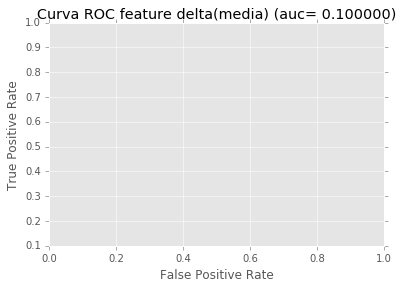

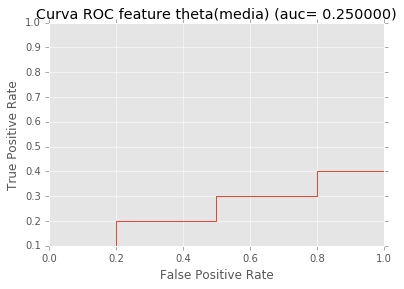

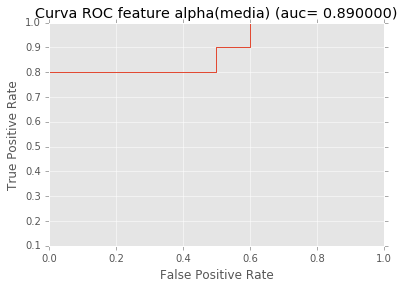

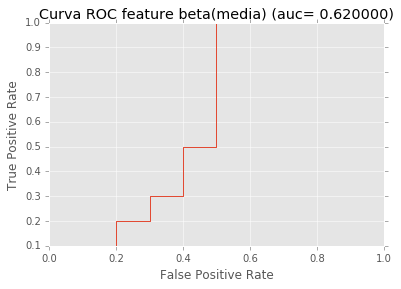

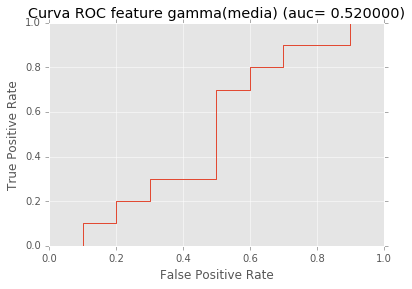

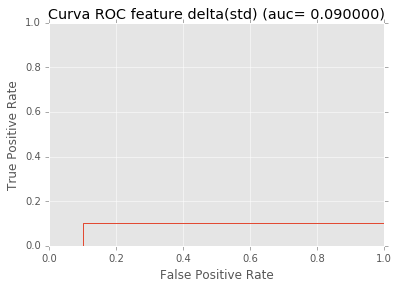

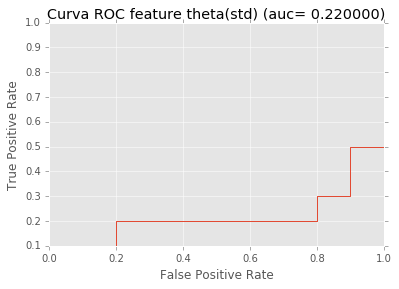

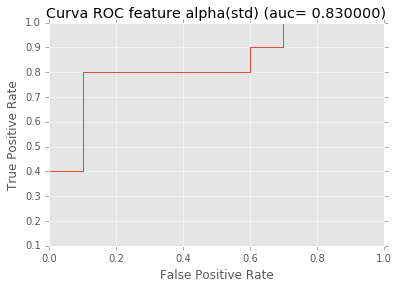

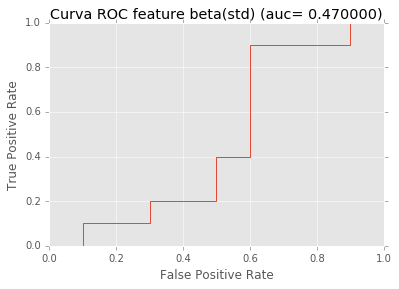

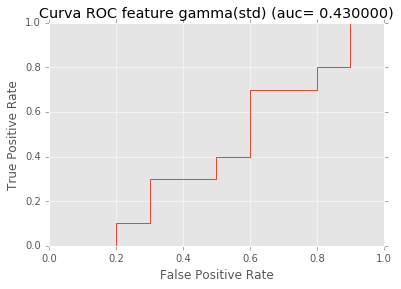

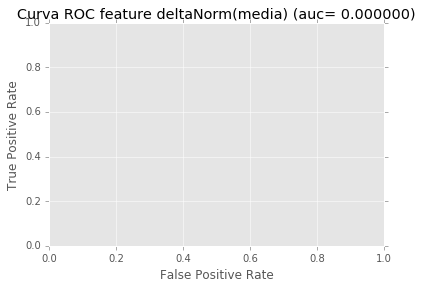

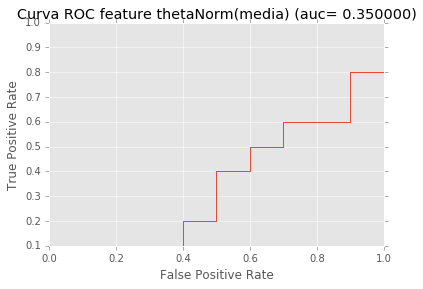

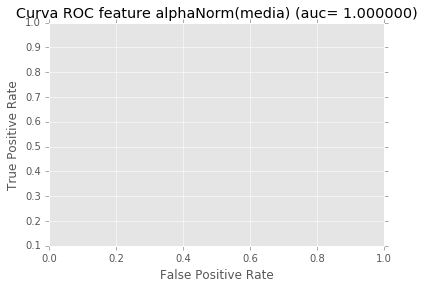

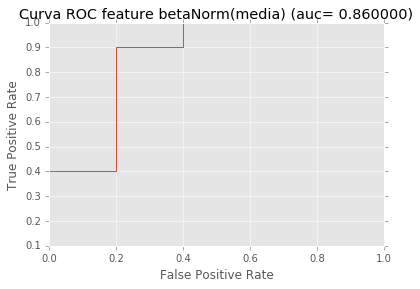

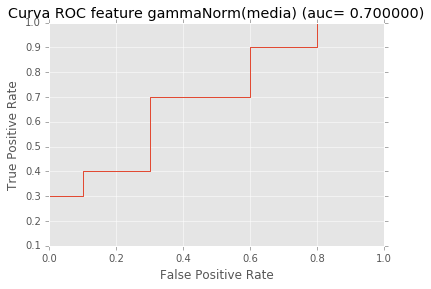

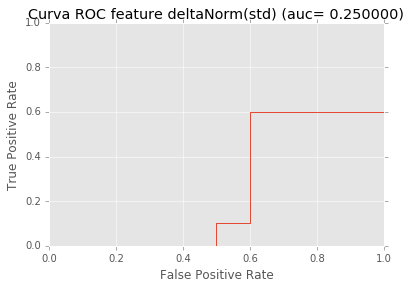

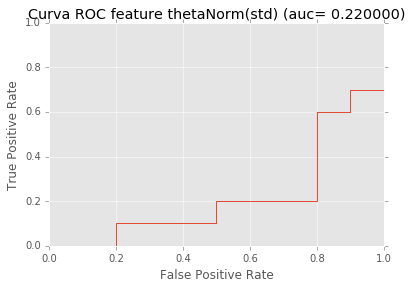

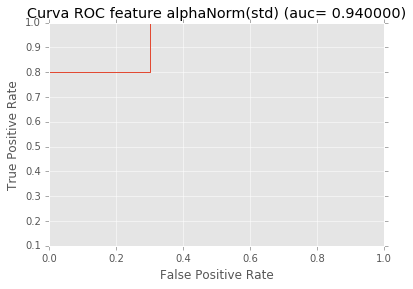

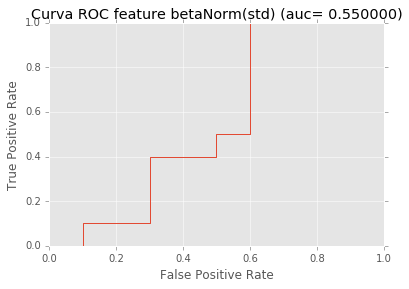

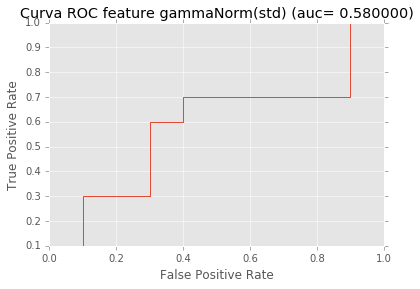

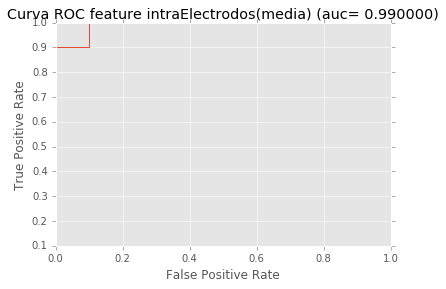

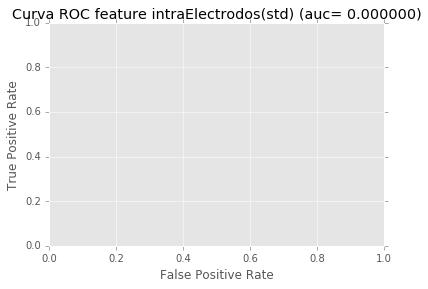

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

target1 = np.zeros(10)
target2 = np.ones(10)
target = np.concatenate((target1, target2), axis=0)

aucPorFeature = {}

for f in xrange(0,22):
    fpr, tpr, thresholds = roc_curve(target,  features[:,f]) # obtener la curva ROC
    plt.figure()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    area = auc(fpr, tpr)
    featureName = getFeatureName(f)
    plt.title("Curva ROC feature %s (auc= %f)" % (featureName,area))
    plt.plot(fpr,tpr) # plotear curva ROC
    aucPorFeature[featureName] = area

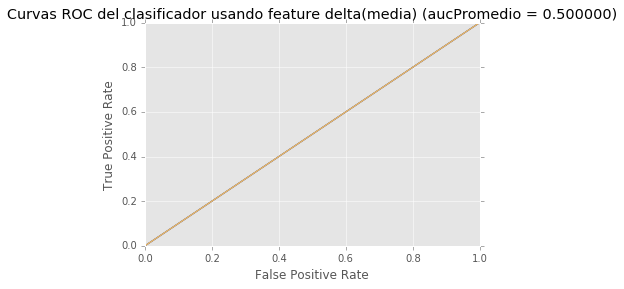

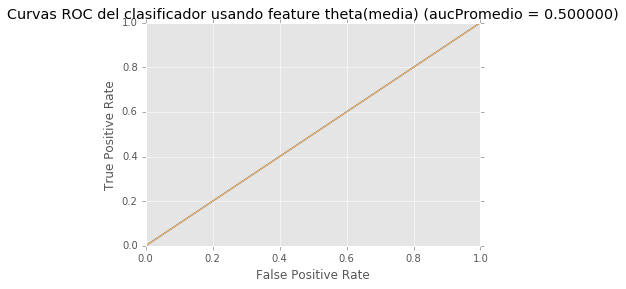

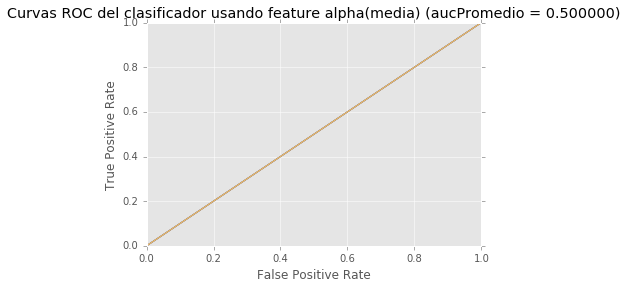

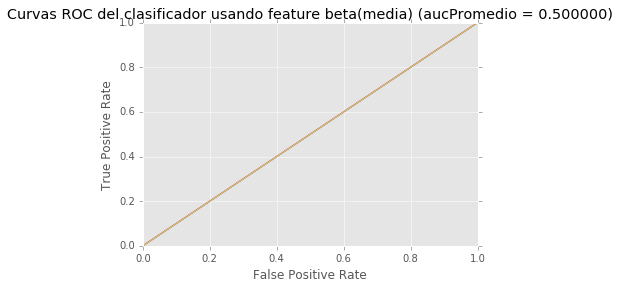

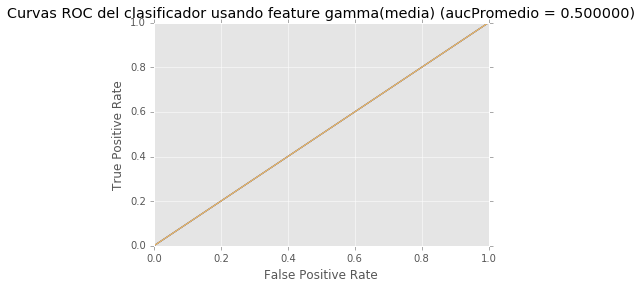

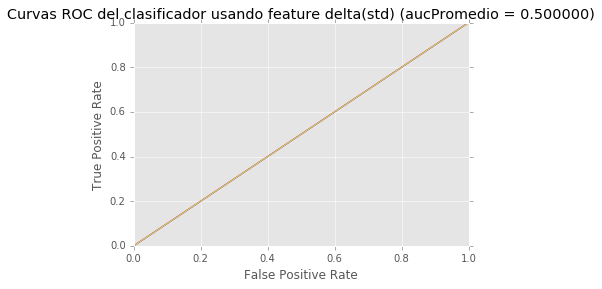

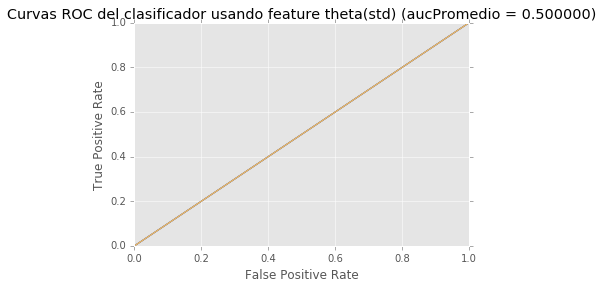

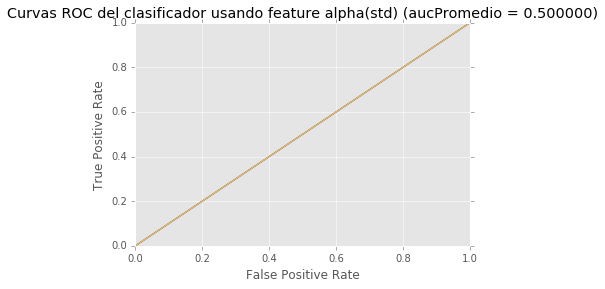

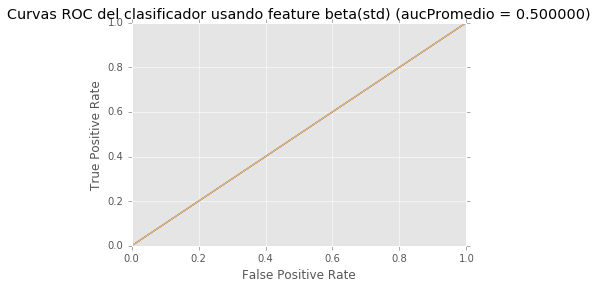

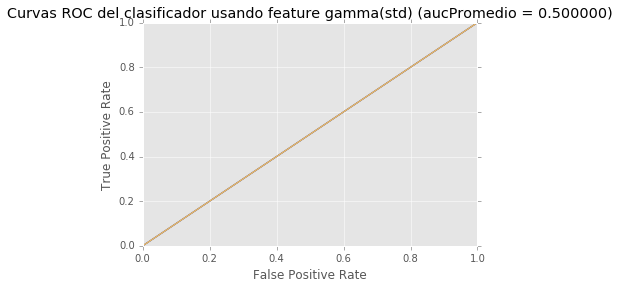

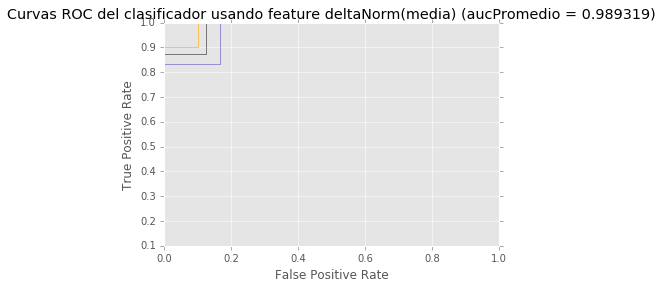

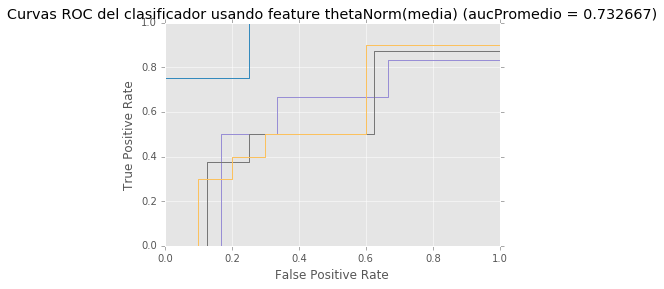

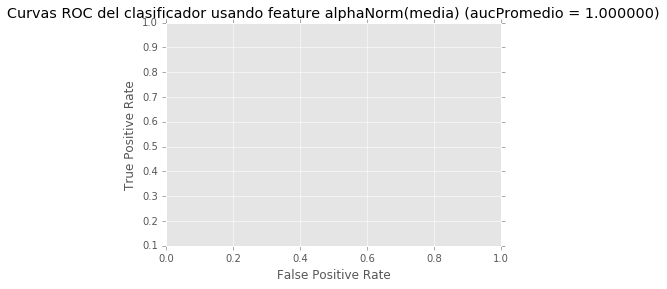

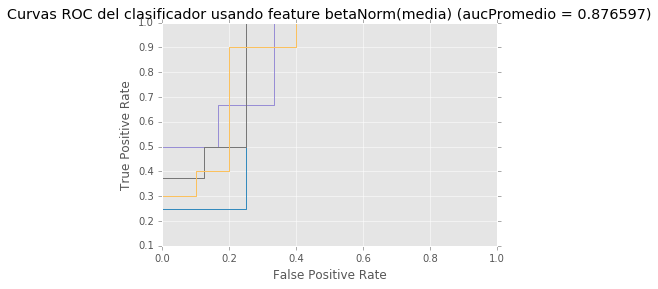

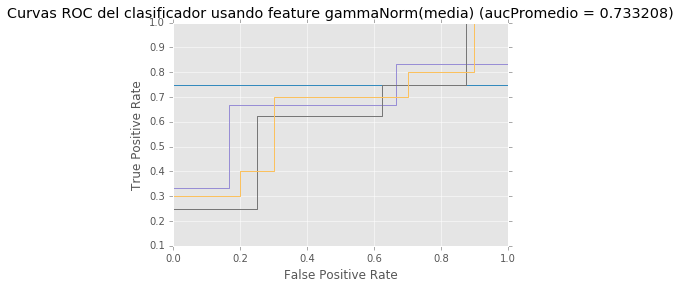

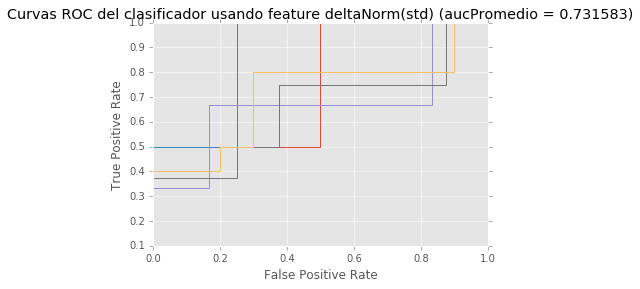

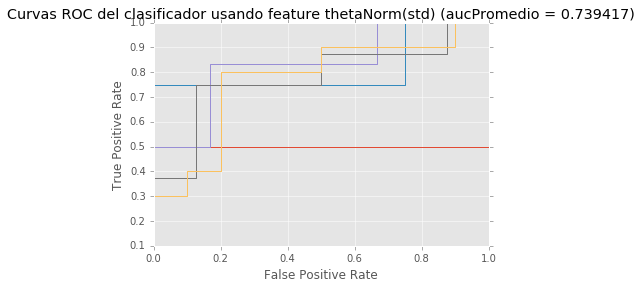

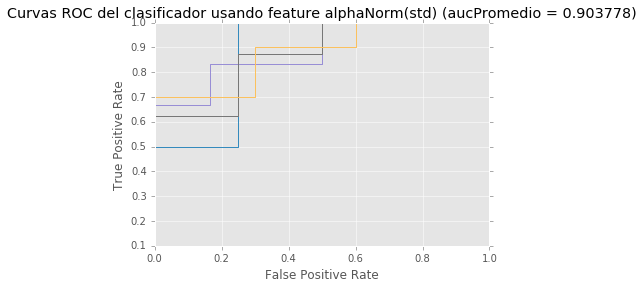

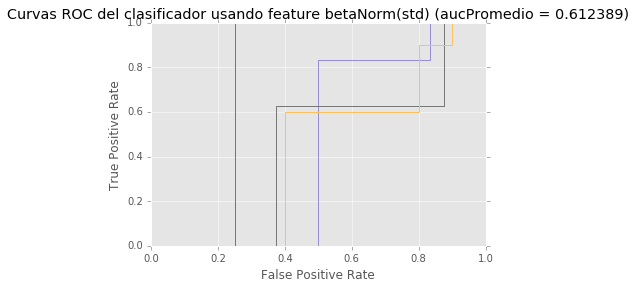

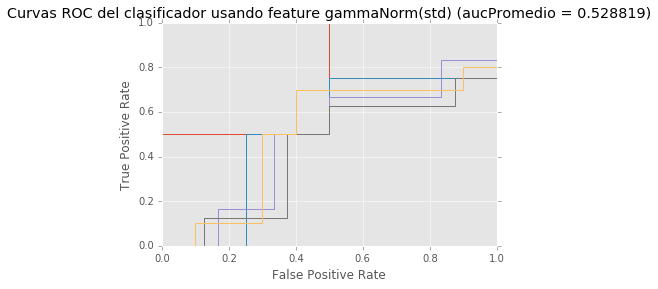

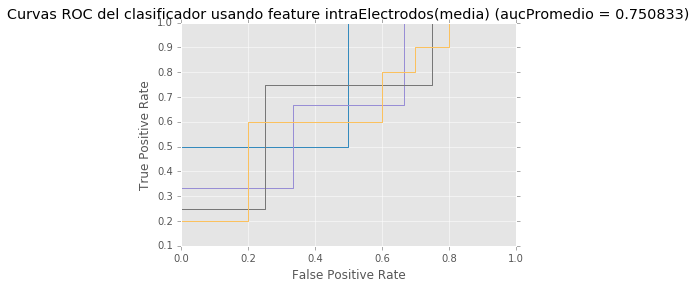

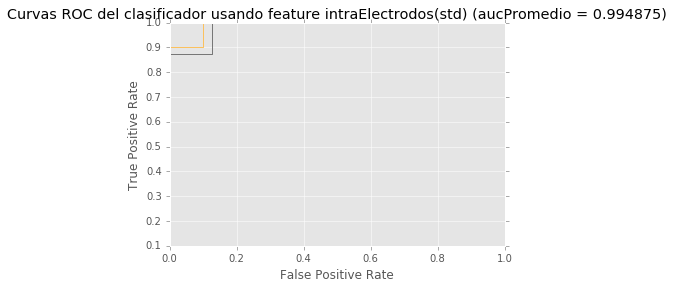

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn import  linear_model

n_folds = 5
aucPorFeature = {}

for f in xrange(0,22):
    featureName = getFeatureName(f)
    plt.figure()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    areaPromedio = 0
    X = np.array(features[:,f]) # array de features
    y = np.array(target) # labels

    cv = StratifiedKFold(n_splits=n_folds, shuffle=True)

    cv_target = np.array([])
    cv_prediction = np.array([])
    cv_probas = np.array([])

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)

        clf = linear_model.LogisticRegression()
        clf = clf.fit(X_train,y_train)

        preds = clf.predict(X_test)
        probas = clf.predict_proba(X_test)

        cv_target = np.concatenate((cv_target, y_test), axis=0) # concatenar los resultados
        cv_prediction = np.concatenate((cv_prediction, preds), axis=0)
        cv_probas = np.concatenate((cv_probas, probas[:,1]), axis=0)

        preds_thr = np.zeros(len(cv_target))
        preds_thr[np.where(cv_probas>0.5)[0]] = 1
        cm = confusion_matrix(cv_target, preds_thr).astype(float)
        cm[0,:] = cm[0,:]/float(sum(cm[0,:])) # obtener matriz de confusion normalizada
        cm[1,:] = cm[1,:]/float(sum(cm[1,:]))

        fpr, tpr, thresholds = roc_curve(cv_target,  cv_probas) # obtener la curva ROC
        area = auc(fpr, tpr)
        areaPromedio = areaPromedio + area
        plt.plot(fpr,tpr) # plotear curva ROC
    areaPromedio = areaPromedio / n_folds
    aucPorFeature[featureName] = areaPromedio
    plt.title("Curvas ROC del clasificador usando feature %s (aucPromedio = %f)" % (featureName, areaPromedio))

En lo que respecta a los features normalizados, en el caso de la curva roc de la Regresión Logística
se obtienen los mejores resultados. 

Esto es debido a que un feature en particular no normalizado, puede comportarse bastante mal en el caso de que
no se encuentre con una distribución que se asemeje a una Gaussiana.

Muchos clasificadores con su función kernel toman a estos features como valores centrados en el 0
y con una varianza del mismo estilo. 

Ejercicio 2. SVM
En el siguiente ejercicio se entrenará un clasificador basado en SVM

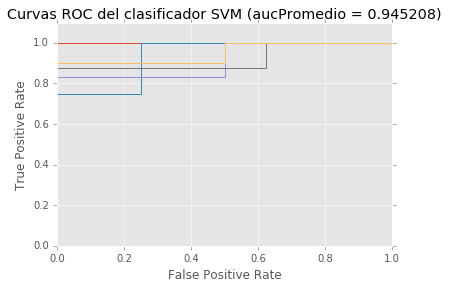

In [303]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

aucPromedio = 0
X = np.array(features) # features
y = np.array(target) # labels

n_folds = 5
cv = StratifiedKFold(n_splits=n_folds, shuffle=True)
cv_target = np.array([])
cv_prediction = np.array([])
cv_probas = np.array([])

plt.figure()
plt.ylim(ymax=1.1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = svm.SVC(kernel='linear', C=1.0, probability=True)
    clf = clf.fit(X_train,y_train)

    preds = clf.predict(X_test)
    probas = clf.predict_proba(X_test)

    cv_target = np.concatenate((cv_target, y_test), axis=0) # concatenar los resultados
    cv_prediction = np.concatenate((cv_prediction, preds), axis=0)
    cv_probas = np.concatenate((cv_probas, probas[:,1]), axis=0)

    preds_thr = np.zeros(len(cv_target))
    preds_thr[np.where(cv_probas>0.5)[0]] = 1
    cm = confusion_matrix(cv_target, preds_thr).astype(float)
    cm[0,:] = cm[0,:]/float(sum(cm[0,:])) # obtener matriz de confusion normalizada
    cm[1,:] = cm[1,:]/float(sum(cm[1,:]))

    fpr, tpr, thresholds = roc_curve(cv_target,  cv_probas) # obtener la curva ROC
    area = auc(fpr, tpr)
    aucPromedio = aucPromedio + area
    plt.plot(fpr,tpr) # plotear curva ROC

aucPromedio = aucPromedio / n_folds
plt.title("Curvas ROC del clasificador SVM (aucPromedio = %f)" % aucPromedio)
plt.show()

Ejercicio 2 b.
En el siguiente punto utilizaremos pipeline de Scikit-Learn para computar las 3 técnicas que nos pide el enunciado.



             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         4
        1.0       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         5



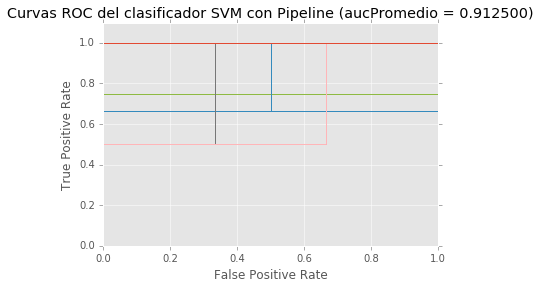

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import math

plt.figure()
plt.ylim(ymax=1.1)
aucPromedio = 0
niters = 100

for i in xrange (1,niters):
    X = np.array(features) # features
    y = np.array(target) # labels
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    featureSelection = SelectPercentile(percentile=10)
    clf = svm.SVC(kernel='linear', probability=True)
    pipeline = make_pipeline(StandardScaler(), featureSelection, clf)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    probas = pipeline.predict_proba(X_test)
    y_probas = probas[:,1]

    fpr, tpr, thresholds = roc_curve(y_test,  y_probas) # obtener la curva ROC
    aucPipeline = auc(fpr, tpr)
    if (not math.isnan(aucPipeline)):
        aucPromedio = aucPipeline + aucPromedio
    plt.plot(fpr,tpr) # plotear curva ROC

print(classification_report(y_test, y_pred))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC del clasificador SVM con Pipeline (aucPromedio = %f)" % (aucPromedio/niters))
plt.show()

Cargamos a mano los features para no cargar nuevamente los dataframe

In [2]:
vector_features = [[  2.89418232e-11,   4.08542945e-12,   2.04544940e-12 ,  4.43373685e-12,
   4.83347284e-12,   5.71516496e-11 ,  6.46769299e-12 ,  2.45435500e-12,
   1.41423236e-11 ,  2.27090412e-11 ,  5.99090724e-01  , 1.31109249e-01,
   8.83711620e-02  , 1.06151601e-01 ,  7.52772654e-02 ,  2.49525221e-01,
   1.17924080e-01 ,  9.50640983e-02 ,  1.04244242e-01 ,  1.14244381e-01,
   5.13295070e+00  , 8.32085928e-02],
[  4.84271760e-11 ,  1.00540108e-11 ,  2.33305775e-12 ,  4.83438659e-12,
   2.39114155e-12 ,  1.78377817e-10 ,  3.02024203e-11 ,  9.04475050e-12,
   1.03255958e-11  , 4.24210590e-12 ,  6.10848517e-01 ,  2.05684101e-01,
   4.98426167e-02 ,  9.11176255e-02 ,  4.25071389e-02 ,  2.29725746e-01,
   1.74086692e-01 ,  4.95597391e-02 ,  1.00382138e-01 ,  5.09221497e-02,
   5.12694987e+00 ,  9.21697326e-02],
[  4.94572681e-11 ,  5.11430914e-12 ,  1.64965870e-12   ,1.34475905e-12,
   7.29500402e-13 ,  8.39647371e-11 ,  5.01146843e-12   ,1.74912076e-12,
   1.54029958e-12 ,  1.33997849e-12 ,  7.39915895e-01   ,1.42780047e-01,
   5.29611046e-02  , 4.20098780e-02 ,  2.23330754e-02  , 1.88087554e-01,
   1.21061268e-01 ,  5.47257705e-02 ,  4.29118990e-02 ,  3.60381675e-02,
   5.10023510e+00 ,  9.81029591e-02],
[  3.26849681e-11 ,  7.37963037e-12 ,  2.73694519e-12 ,  1.44825489e-12,
   5.58076985e-13 ,  1.18300344e-10 ,  8.62163862e-12 ,  3.02586627e-12,
   2.02711615e-12 ,  9.17712161e-13 ,  5.49219920e-01 ,  2.61812703e-01,
   1.10527927e-01 ,  5.70445413e-02 ,  2.13949090e-02 ,  2.30245367e-01,
   1.67699364e-01 ,  9.42976359e-02 ,  5.01426881e-02 ,  2.75646478e-02,
   5.12575124e+00 ,  8.18592315e-02],
[  6.78450878e-11 ,  5.75598765e-12 ,  3.98591872e-12 ,  1.90243548e-11,
   1.57506482e-11 ,  1.52930127e-10 ,  1.49594101e-11 ,  1.89084092e-11,
   2.01204262e-10 ,  2.14318291e-10 ,  5.80872953e-01 ,  9.11074603e-02,
   5.62468651e-02 ,  1.68736017e-01 ,  1.03036704e-01 ,  2.66866236e-01,
   8.28663977e-02 ,  5.08725588e-02 ,  1.45809706e-01 ,  9.81483380e-02,
   5.14502672e+00 ,  8.20524444e-02],
[  4.34183998e-11 ,  4.04415040e-12 ,  2.85390368e-12 ,  1.75727042e-12,
   4.39140809e-13 ,  1.62710795e-10 ,  5.76735368e-12 ,  3.14104554e-12,
   2.11169459e-12 ,  8.14150822e-13 ,  7.10048485e-01 ,  1.17505013e-01,
   1.00325245e-01 ,  5.87725493e-02 ,  1.33487079e-02 ,  2.00881489e-01,
   1.07564916e-01 ,  9.97497825e-02 ,  5.65463872e-02 ,  1.71835520e-02,
   5.09907964e+00 ,  9.73900797e-02],
[  4.89641852e-11 ,  7.98159231e-12 ,  1.46054573e-12 ,  5.16622572e-12,
   2.41092940e-12 ,  7.40867276e-11 ,  9.75313444e-12 ,  1.73773585e-12,
   1.16259449e-11 ,  5.63726212e-12 ,  6.74026739e-01 ,  1.37979774e-01,
   3.80723314e-02 ,  1.03486088e-01 ,  4.64350677e-02 ,  1.94983651e-01,
   9.12447489e-02 ,  3.88217831e-02 ,  1.15400712e-01 ,  6.34645758e-02,
   5.13020780e+00 ,  7.16016253e-02],
[  2.44859066e-11 ,  5.05588311e-12 ,  7.52051789e-13 , 8.59025156e-13,
   2.75460114e-13 ,  7.27431409e-11 ,  1.22518783e-11 ,  1.18405643e-12,
   1.01612373e-12 ,  3.29450062e-13 ,  5.97904896e-01 ,  2.34664990e-01,
   6.17936043e-02 ,  8.15121520e-02 ,  2.41243579e-02 ,  2.32612750e-01,
   1.69722088e-01 ,  6.26754420e-02 ,  8.90318743e-02 ,  2.67218767e-02,
   5.11847275e+00 ,  9.16621321e-02],
[  4.73494593e-11 ,  1.56995678e-11 ,  4.93277783e-12 ,  1.43243429e-11,
   1.05173293e-11 ,  7.12256467e-11 ,  1.65716534e-11 ,  5.67494216e-12,
   1.67185360e-11 ,  1.41295611e-11 ,  4.53620611e-01 ,  1.99863629e-01,
   6.53289836e-02 ,  1.64580627e-01 ,  1.16606149e-01 ,  2.31158101e-01,
   1.47057553e-01 ,  5.04896245e-02 ,  1.17852116e-01 ,  1.00785062e-01,
   5.15580612e+00 ,  6.80155671e-02],
[  5.81430176e-11 ,  4.33614500e-12 ,  9.68055136e-13 ,  1.31012302e-12,
   6.65049346e-13 ,  8.33045536e-10 ,  1.91695856e-11 ,  2.87280833e-12,
   4.33632782e-12 ,  2.42848417e-12 ,  7.31455089e-01 ,  1.60698506e-01,
   4.16213627e-02 ,  4.75007174e-02 ,  1.87243249e-02 ,  1.93013001e-01,
   1.44369476e-01 ,  4.38864798e-02 ,  4.93538753e-02 ,  3.05818000e-02,
   5.09349098e+00 ,  1.00389636e-01],
[  1.12297565e-11 ,  2.46989742e-12 ,  2.19983091e-12 ,  4.50361683e-12,
   3.90939157e-12 ,  2.49884645e-11 ,  5.41777898e-12 ,  2.73311101e-12,
   1.19378890e-11 ,  1.01782571e-11 ,  3.63714429e-01 ,  1.11489735e-01,
   1.30877809e-01 ,  2.22473051e-01 ,  1.71444977e-01 ,  2.06634257e-01,
   8.38902528e-02 ,  1.03699300e-01 ,  1.12419771e-01 ,  1.08446940e-01,
   5.18450938e+00 ,  4.71491660e-02],
[  8.52595477e-12 ,  5.13780032e-12 ,  1.64248534e-11 ,  4.56297904e-12,
   6.70156389e-13 ,  2.92511775e-11 ,  5.21245753e-12 ,  2.21669739e-11,
   3.58012845e-12 ,  8.53911399e-13 ,  2.41173024e-01 ,  1.74835020e-01,
   4.00884634e-01 ,  1.59608735e-01 ,  2.34985865e-02 ,  1.54517348e-01,
   1.23264391e-01 ,  1.97413866e-01 ,  8.85119704e-02 ,  2.56377286e-02,
   5.16725537e+00 ,  5.10001147e-02],
[  9.93342840e-12 ,  2.97094441e-12 ,  1.31241302e-11 ,  2.14045286e-12,
   3.78759252e-13 ,  1.51414224e-11 ,  2.79888143e-12 ,  1.73370010e-11,
   1.35845261e-12 ,  4.07037265e-13 ,  3.32931591e-01 ,  1.17006966e-01,
   4.29884022e-01 ,  1.01427768e-01 ,  1.87496533e-02 ,  2.04936869e-01,
   7.78102048e-02 ,  2.17286367e-01 ,  6.52465725e-02 ,  1.90899468e-02,
   5.15075059e+00 ,  5.92995481e-02],
[  7.54565695e-12 ,  4.33283295e-12 ,  1.77564281e-11 ,  3.22240126e-12,
   1.53562902e-12 ,  1.93704274e-11 ,  5.81879386e-12 ,  1.82870938e-11,
   2.93875634e-12 ,  2.26004789e-12 ,  2.15609664e-01 , 1.39757025e-01,
   4.75140521e-01 ,  1.13090417e-01 ,  5.64023722e-02 ,  1.59233175e-01,
   1.05135658e-01 ,  2.21005342e-01 ,  7.13232819e-02 ,  5.98921750e-02,
   5.16618989e+00 ,  5.10224371e-02],
[  1.09191830e-11 ,  1.00520595e-11 ,  1.19878472e-11 ,  3.94935287e-12,
   5.74021641e-13 ,  2.91693957e-11 ,  1.76174030e-11 ,  2.34513855e-11,
   3.60673888e-12 ,  5.96439090e-13 ,  2.98852569e-01 ,  2.71029137e-01,
   2.61542637e-01 ,  1.44570395e-01 ,  2.40052615e-02 ,  2.02048241e-01,
   1.69168288e-01 ,  2.24824007e-01 ,  1.07040375e-01 ,  2.54722190e-02,
   5.15977907e+00 ,  5.67302930e-02],
[  6.76511818e-12 ,  2.91872112e-12 ,  1.26339204e-11 ,  5.10786484e-12,
   1.99645739e-12 ,  1.11843191e-11 ,  2.47012930e-12 ,  1.99710475e-11,
   5.96702023e-12 ,  3.66862337e-12 ,  2.52656618e-01 , 1.31719884e-01,
   3.59758202e-01 ,  1.90580205e-01 ,  6.52850904e-02 ,  1.84262018e-01,
   9.56119196e-02 ,  2.30918320e-01 ,  1.12451374e-01 ,  6.96222790e-02,
   5.16974337e+00 ,  5.00622899e-02],
[  1.70659741e-11 ,  2.28303641e-12 ,  1.08958214e-11 ,  3.67007543e-12,
   1.61874563e-12 ,  4.25606130e-11 ,  3.76495676e-12 ,  1.18976168e-11,
   3.05800425e-12 ,  2.16170861e-12 ,  3.39087031e-01 ,  7.54827926e-02,
   3.63955790e-01 ,  1.50460405e-01 ,  7.10139811e-02 ,  2.30123808e-01,
   6.17941378e-02 ,  2.27018733e-01 ,  8.30397186e-02 ,  7.28555317e-02,
   5.15952187e+00 ,  6.78409577e-02],
[  1.45925921e-11 ,  2.03110917e-12 ,  1.77546986e-11 ,  7.91274678e-12,
   6.02331083e-12 ,  3.86181286e-11 ,  2.10125421e-12 ,  1.88807251e-11,
   8.68839469e-12 ,  2.03107789e-11 ,  2.26246631e-01 ,  5.48216440e-02,
   3.89004996e-01 ,  2.05079020e-01 ,  1.24847709e-01 ,  1.83054950e-01,
   4.90203708e-02 ,  2.29021197e-01 ,  1.19731372e-01 ,  1.10379303e-01,
   5.17433678e+00 ,  5.31743693e-02],
[  1.01638621e-10 ,  2.36212255e-11 ,  1.91713418e-11 ,  1.98858417e-11,
   1.19391898e-11 ,  4.34438981e-10 ,  5.65257866e-11 ,  3.71397214e-11,
   3.28159248e-11 ,  1.28716144e-11 ,  3.40422337e-01 ,  1.51235535e-01,
   1.39265513e-01 ,  1.74278102e-01 ,  1.94798512e-01 ,  2.02908222e-01,
   9.23425219e-02 ,  7.18438039e-02 ,  8.78265948e-02 ,  1.47417739e-01,
   5.20827284e+00 ,  5.78897836e-02],
[  1.41763506e-11 ,  2.56644055e-12 ,  2.02724984e-12 ,  2.51404615e-12,
   1.77593379e-12 ,  3.81646324e-11 ,  3.01174729e-12 ,  2.07117712e-12,
   2.35996657e-12 ,  1.93161010e-12 ,  4.53190667e-01 ,  1.51026772e-01,
   1.24386308e-01 ,  1.58645286e-01 ,  1.12750966e-01 ,  2.28674696e-01,
   1.03876047e-01 ,  9.30889641e-02 ,  9.35149308e-02 ,  8.13692177e-02,
   5.16409793e+00 ,  5.87448874e-02]]

Probamos utilizando un 20% de los features, para poder ver como varía el área de la curva Roc.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         5



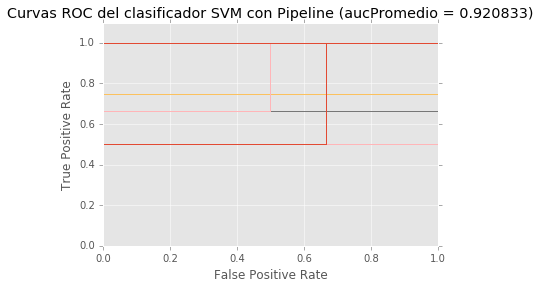

In [5]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sps
import scipy.io as sio
%matplotlib inline
matplotlib.style.use('ggplot')


plt.figure()
plt.ylim(ymax=1.1)
aucPromedio = 0
niters = 100

features = np.array(vector_features)
target = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
for i in xrange (1,niters):
    X = np.array(features) # features
    y = np.array(target) # labels
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    featureSelection = SelectPercentile(percentile=20)
    clf = svm.SVC(kernel='linear', probability=True)
    pipeline = make_pipeline(StandardScaler(), featureSelection, clf)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    probas = pipeline.predict_proba(X_test)
    y_probas = probas[:,1]
       
    
    fpr, tpr, thresholds = roc_curve(y_test,  y_probas) # obtener la curva ROC
    aucPipeline = auc(fpr, tpr)
    if (not math.isnan(aucPipeline)):
        aucPromedio = aucPipeline + aucPromedio
    plt.plot(fpr,tpr) # plotear curva ROC

print(classification_report(y_test, y_pred))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC del clasificador SVM con Pipeline (aucPromedio = %f)" % (aucPromedio/niters))
plt.show()

Corriendo con un 20% de los features elegidos al azar, obtenemos una mejor curva roc, obteniendo así un área mas grande. 
Esto se debe a una mayor caracterización de los individuos, al tener mas features elegidos, tenemos mas chances
de poder obtener un mayor conocimiento de cada elemento a clasificar, y así elevar las chances de que esos features
elegidos sean features realmente distintivos, osea características que realmente marquen una diferencia entre las dos clases,
como por ejemplo puede ser el feature de alpha.


Siguiendo con esta misma lógica, al tener los 35% de features elegidos al azar, poseemos nuevamente mas chances de conseguir los features mas distintivos de ambas clases, los que mejor clasifiquen a los individuos. 
Si bien tenemos mas chances de conseguir estos features, vale aclarar que no es algo seguro, ya que como la elección de los mismos se realiza al azar, eligiendo el 20% de los mismos podemos conseguir a los mejores features, y tratando de seleccionar el 35% de los mismos, no los consigamos.